<a href="https://colab.research.google.com/github/ShyamSundhar1411/My-ML-Notebooks/blob/master/Gradient%20Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent

### Summary


Gradient Descent (GD) is an optimization algorithm used to minimize a **cost function** by iteratively moving towards its local minimum.
It does this by **updating the parameters** in the direction opposite to the gradient of the function.

---

For a function $f(\theta)$, the parameters are updated using the following rule:

$\theta' = \theta - \alpha \cdot \nabla f(\theta)$

Where
  - $\theta'$ = New Updated Parameter
  - $\theta$ = Old Parameter
  - $\alpha$ = Learning Rate

---
#### Pseudocode
1. **Initialize** parameters randomly or with zeros.
2. **Compute the gradient** of the loss function with respect to the parameters.
3. **Update the parameters** using the gradient and the learning rate.
4. **Repeat** the process over multiple iterations until convergence.

---

### Convergence Criteria
- The algorithm converges when the **change in cost function** between iterations is minimal or when the gradient approaches zero.
- A **small learning rate** leads to slow convergence, while a **large learning rate** may overshoot the minimum.

---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Let's take the function $f(x; w, b)$, which represents a logistic function:

$$
f(x;w,b) = \frac{1}{1 + e^{- (wx + b)}}
$$




In [ ]:
def f(x,w,b):
  return 1/(1+np.exp(-x*w-b))

In [ ]:
x = np.arange(-10,10,1)

In [ ]:
x

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9])

In [ ]:
def plot_f(x):
  y = f(x,1,0)
  plt.plot(x,y)
  plt.show()

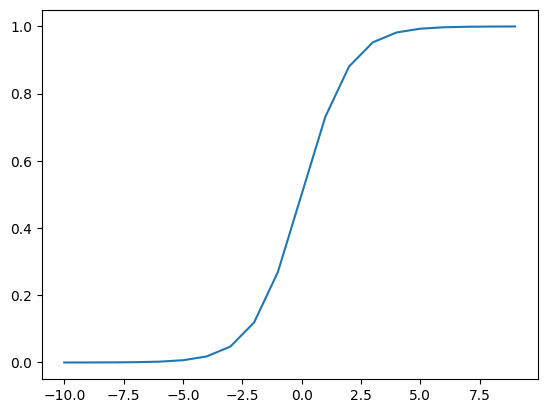

In [ ]:
plot_f(x)

In [ ]:
def loss_function(X,Y,w,b):
  loss = 0
  for x,y in zip(X,Y):
    f_x = f(x,w,b)
    loss += (f_x-y)**2
  return loss*0.5

In [ ]:
def grad_b(x,w,b,y):
  f_x = f(x,w,b)
  grad = (f_x-y)*(f_x)*(f_x-1)
  return grad


In [ ]:
def grad_w(x,w,b,y):
  f_x = f(x,w,b)
  grad = (f_x-y)*(f_x)*x*(1-f_x)
  return grad

In [ ]:
X = [0.5,2.5]
y = [0.2,0.9]

In [96]:
def gradient_descent(X,Y,epoch = 100,learning_rate = 1):
  w,b,eta = -2,-2,learning_rate
  w_history = [w]
  b_history = [b]
  loss_history = [loss_function(X,Y,w,b)]
  for _ in range(epoch):
    delta_w,delta_b = 0,0
    for x,y in zip(X,Y):
      delta_w += grad_w(x,w,b,y)
      delta_b += grad_b(x,w,b,y)
    w = w - eta*delta_w
    b = b - eta*delta_b
    w_history.append(w)
    b_history.append(b)
    loss_history.append(loss_function(X,Y,w,b))
  return w,b,w_history,b_history,loss_history


In [98]:
def plot_3d_contour(X,Y,learning_rate,epochs = 10):
  w, b, w_history, b_history, loss_history = gradient_descent(X, y, epoch=epochs,learning_rate = learning_rate,)
  fig = plt.figure(figsize=(12, 8))
  ax = fig.add_subplot(111, projection='3d')
  w_range = np.linspace(min(w_history) - 2, max(w_history) + 2, 100)
  b_range = np.linspace(min(b_history) - 2, max(b_history) + 2, 100)
  W, B = np.meshgrid(w_range, b_range)
  L = np.array([[loss_function(X, y, w, b) for w, b in zip(W_row, B_row)] for W_row, B_row in zip(W, B)])
  ax.plot_surface(W, B, L, cmap='viridis', alpha=0.7)


  ax.plot(w_history, b_history, loss_history, color='red', marker='o', label='Trajectory')


  ax.set_xlabel('Weight (w)')
  ax.set_ylabel('Bias (b)')
  ax.set_zlabel('Loss')
  ax.set_title('Gradient Descent Trajectory on 3D Loss Contour')
  ax.legend()

  plt.show()

In [100]:
def plot_2d_contour(X,Y,learning_rate,epochs = 10):
  w, b, w_history, b_history, loss_history = gradient_descent(X, y, epoch=epochs,learning_rate = learning_rate)
  fig, ax = plt.subplots(figsize=(12, 8))

  w_range = np.linspace(min(w_history) - 2, max(w_history) + 2, 100)
  b_range = np.linspace(min(b_history) - 2, max(b_history) + 2, 100)
  W, B = np.meshgrid(w_range, b_range)
  L = np.array([[loss_function(X, y, w, b) for w, b in zip(W_row, B_row)] for W_row, B_row in zip(W, B)])


  contour = ax.contourf(W, B, L, levels=50, cmap='plasma', alpha=0.7)
  plt.colorbar(contour)


  ax.plot(w_history, b_history, color='red', marker='o', label='Trajectory')


  ax.set_xlabel('Weight (w)')
  ax.set_ylabel('Bias (b)')
  ax.set_title('Gradient Descent Trajectory on 2D Contour')
  ax.legend()

  plt.show()


### 3D Contour Plot

The 3D contour plot illustrates how gradient descent minimizes the loss function by iteratively updating the parameters 𝑤 and 𝑏. Since the loss surface in linear regression is convex, the algorithm consistently converges towards the global minimum, which is also the only minimum. The smooth descent path indicates stable convergence, while the gradual reduction in step size near the minimum shows the model approaching optimal parameters.

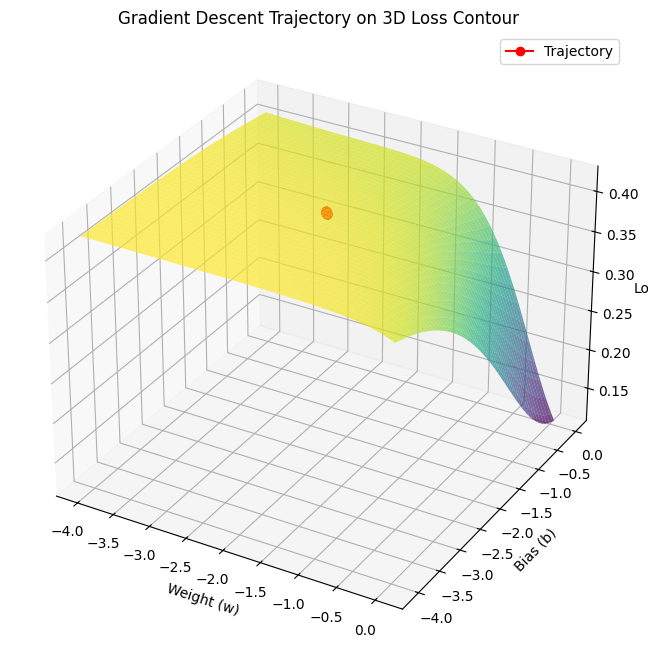

In [102]:
plot_3d_contour(X,y,learning_rate = 0.1,epochs = 100)

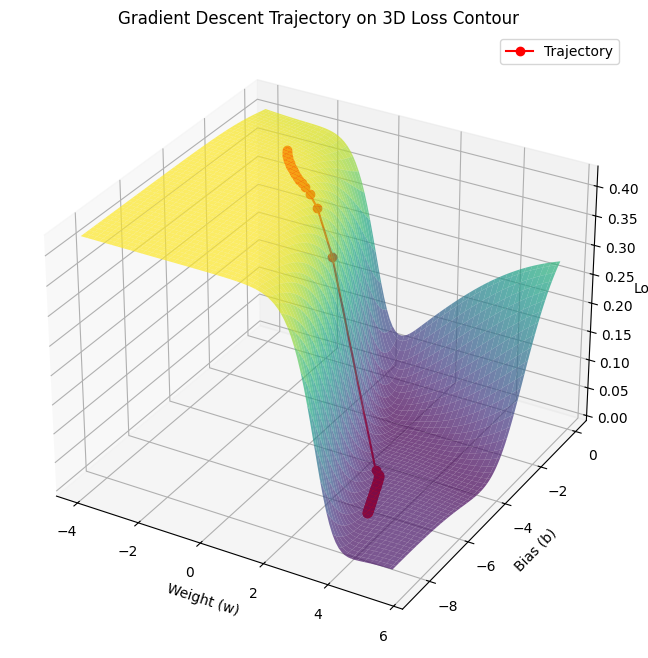

In [101]:
plot_3d_contour(X,y,learning_rate = 10,epochs = 100)

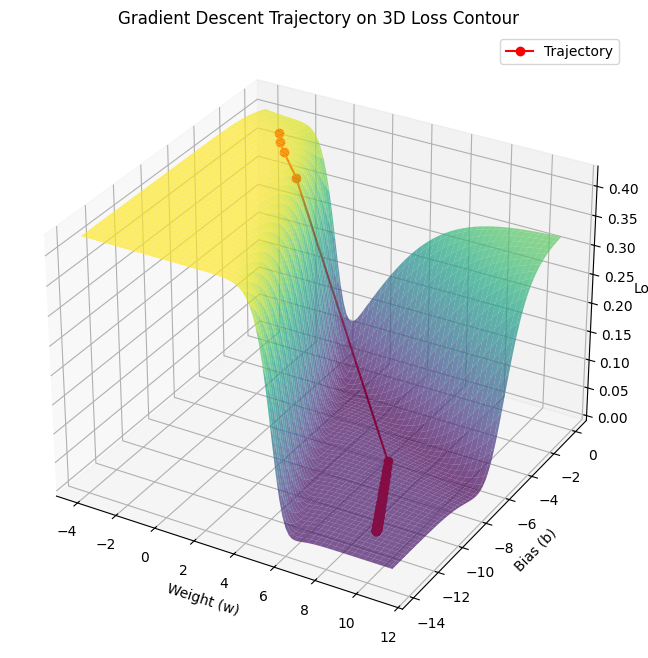

In [103]:
plot_3d_contour(X,y,learning_rate = 100,epochs = 100)

#### 2D Contour Plot for Gradient Descent

As visualized the trajectory approaches towards the lower loss function which is the purple region and as it reaches the point of global minimum the step size decreases over the epochs.

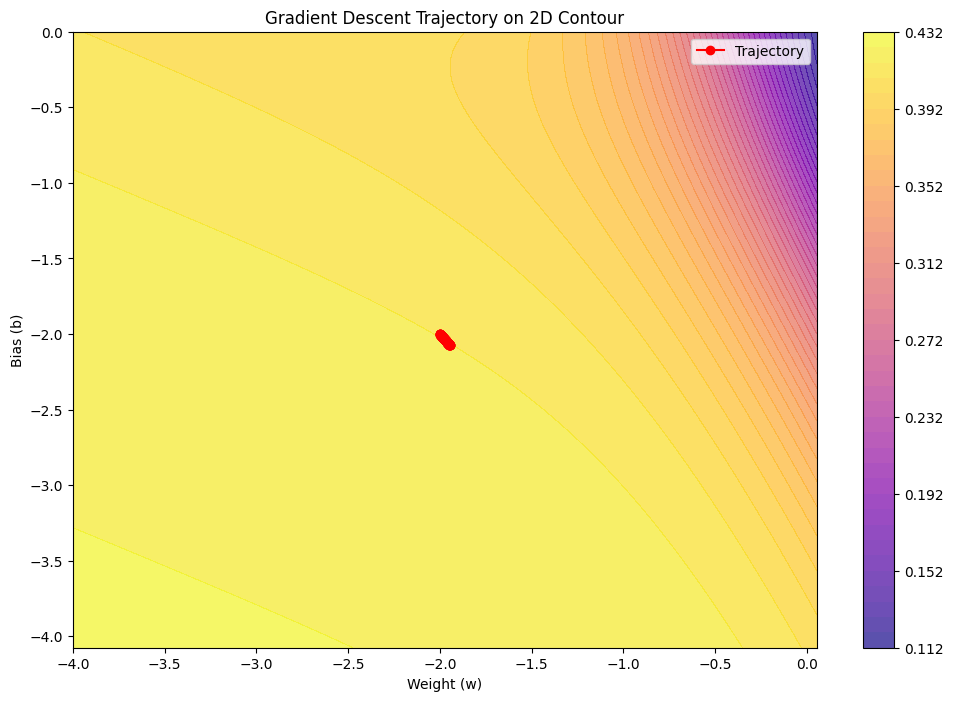

In [105]:
plot_2d_contour(X,y,learning_rate = 0.1,epochs = 100)

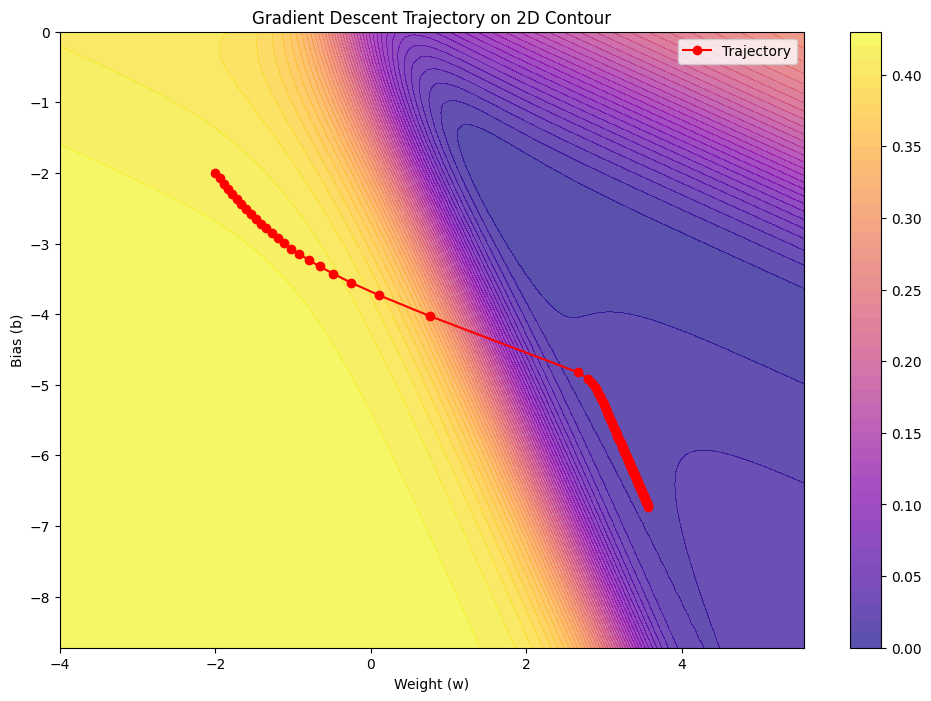

In [106]:
plot_2d_contour(X,y,learning_rate = 10,epochs = 100)

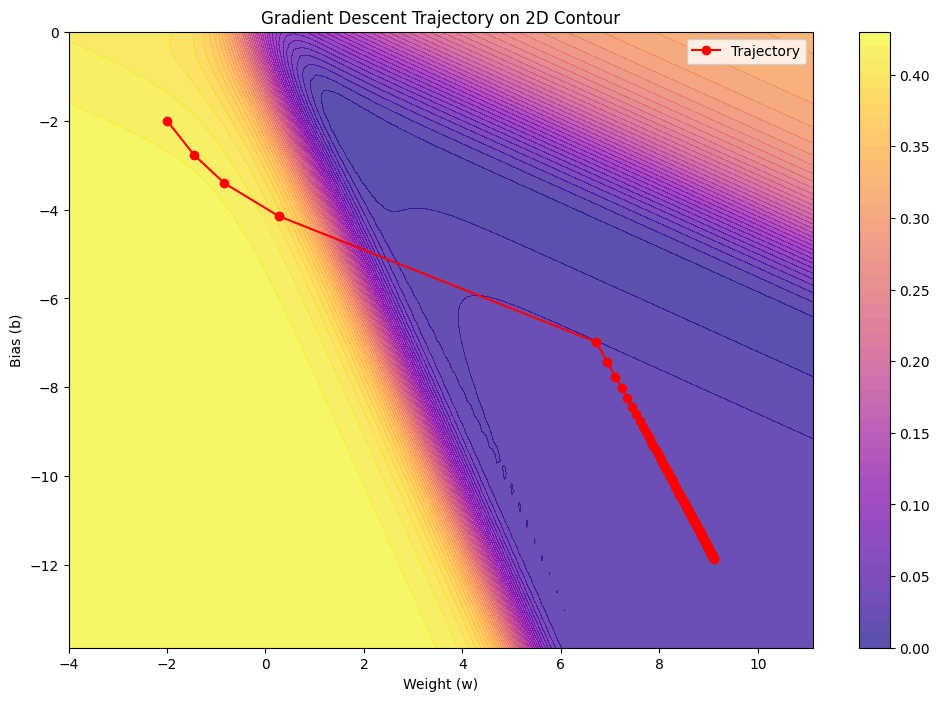

In [107]:
plot_2d_contour(X,y,learning_rate = 100,epochs = 100)

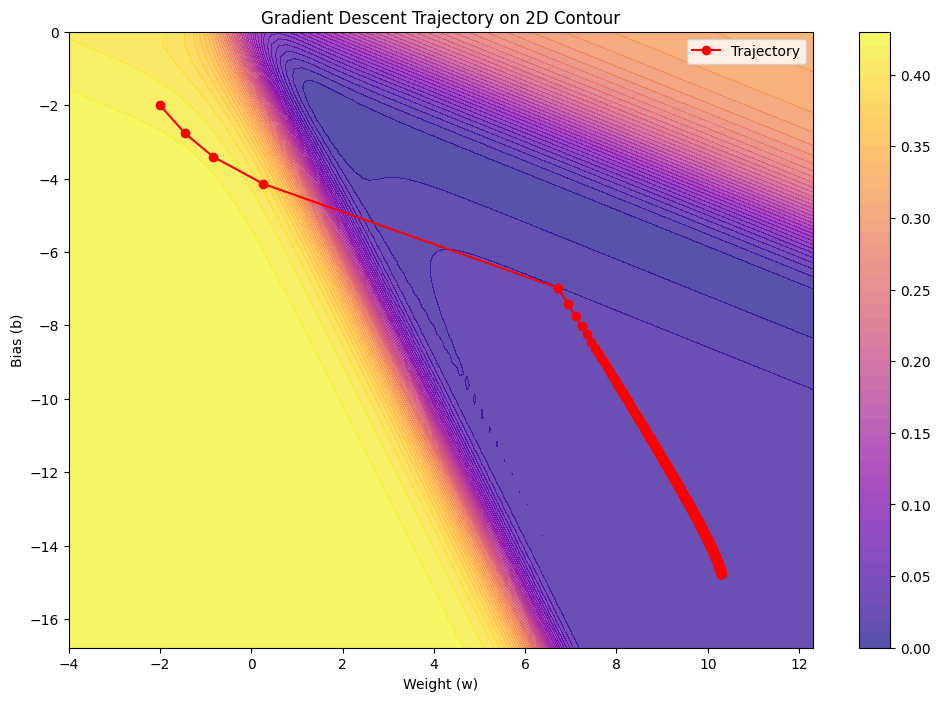

In [108]:
plot_2d_contour(X,y,learning_rate = 100,epochs = 1000)

#### Why does it not always optimal to use Vanilla Gradient Descent ?

Issues in Vanilla Gradient Descent:
1.   Works only with Linear Function. When it comes to non-linear function, it gets struck in saddle points or local minima
2.   It oscillates near minimum if learning rate is too high.
3.   Does not have adaptive learning rate. If learning rate is too low, convergence is slow.



